
## Sammenligning av lettlest-bøker mot andre ungdomsbøker


In [1]:
import nbtext as nb
from nbtext import get_urns_from_text, Corpus_urn, get_urn

import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
# finn rett sti til mappen med word-filer, og erstatt den med den som ligger her

urns = get_urns_from_text('./urner_lettlest.txt')

# lager et referansekorpus

refurns = get_urns_from_text('./urnref.txt')
refurns = [x for x in refurns if not x.startswith('2017') and not x.startswith('2018')]
# voksenkorpus

vrefurns = nb.get_urn({'year':1970, 'next':60, 'ddk':"839%", 'limit':40})
reference = [r[0] for r in vrefurns]

# Lager korpus

Dataene som brukes i sammenligningen kommer fra lister over URNer som ligger i fila `urner_lettlest.txt`, og fra listen over URN-er som ligger i fila `urnref.txt`.

For sammenligning av tekster fra Dewey ligger info om WebDewey [her](http://deweysearchno.pansoft.de/webdeweysearch/executeSearch.html?lastScheduleRecord=&lastTableRecord=&query=808.80384&catalogs=nb.no)

In [50]:
# f er målkorpuset

f = nb.get_corpus_text(urns, top=0, cutoff=0)
nb.normalize_corpus_dataframe(f)

True

In [51]:
# r er ungdomstekster

r = nb.get_corpus_text(refurns, top=0, cutoff=0)
nb.normalize_corpus_dataframe(r)

True

In [80]:
# v er voksenkorpuset

v = nb.get_corpus_text(reference, top=0, cutoff=0)
nb.normalize_corpus_dataframe(v)

True

## Kode for å beregne forholdet mellom tegn i en tekst

In [7]:
import pandas as pd

def ratio(frame, val1, val2):
    return pd.DataFrame(frame.dropna()[val1]/frame.dropna()[val2]).dropna()

In [8]:
def sammenlign(f, r, value, labels=['f','r'], title="Sammenlign"):
    plt.figure(figsize=(10,5))
    plt.title(title)
    plt.hist(f.transpose().dropna()[value], bins=10, density=True, color='blue', alpha=0.6);
    plt.hist(r.transpose().dropna()[value], bins=10, density=True, color='orange', alpha = 0.6);
    plt.legend(labels)
    plt.tight_layout()
    return

def plottlitt(f, r, labels=['lettlest','referanse'], title="Sammenlign"):
    plt.figure(figsize=(10,5))
    plt.title(title)
    lett = plt.hist(f, bins=10, density=True, color='blue', alpha=0.6, label ='lett');
    ref = plt.hist(r, bins=10, density=True, color='orange', alpha = 0.6, label ='referanse');
    plt.legend(labels)
    plt.tight_layout()
    return
    

## Punktum og komma som kompleksitetsmarkører

Mange punktum (relativt) er koblet til setningslengde. Lange setninger gir også flere komma.


Her sjekker vi forholdet mellom antall punktum og komma - hvert dokument er knyttet til forholdstallet: $doc \leftarrow\frac{punktum}{komma}$. Jo mer punktum og færre komma, jo større blir verdien. Her forventes det at lettlest-tekster har større verdi enn referansen.

I histogrammet gir tallet på x-aksen forholdstallet, og y-aksen gir antallet dokument. Histogrammene er relativisert for å kunne gjøre sammenligning, siden referansekorpuset er større enn målkorpuset.


Ratioen forsterker effekten av at tekstene i lettlestkategorien
har flere punktum og færre komma (relativt sett) enn i referansekategorien

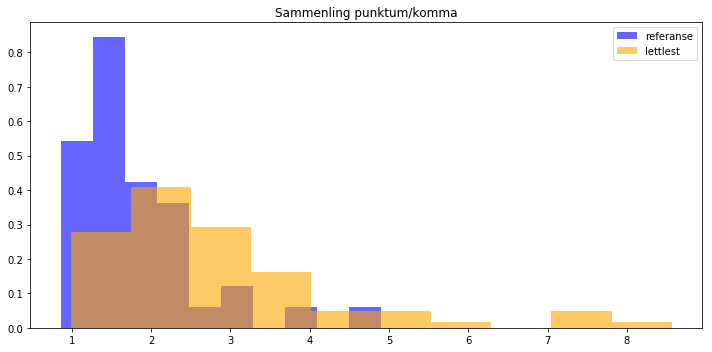

In [53]:
plottlitt(ratio(r.transpose(),'.',',')[0], ratio(f.transpose(),'.',',')[0], labels=['referanse','lettlest'], title="Sammenling punktum/komma")

#### Sammenligning av komma i de to kategoriene. Lettlest har færre komma og flere punktum. I praksis betyr det kortere setninger.

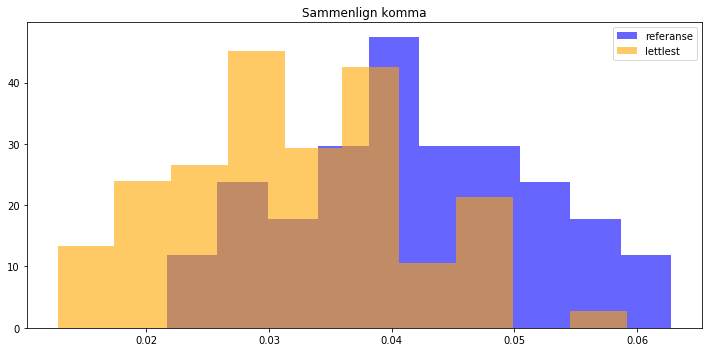

In [54]:
plottlitt(r.transpose().dropna()[','], f.transpose()[','], labels=['referanse','lettlest'], title="Sammenlign komma")

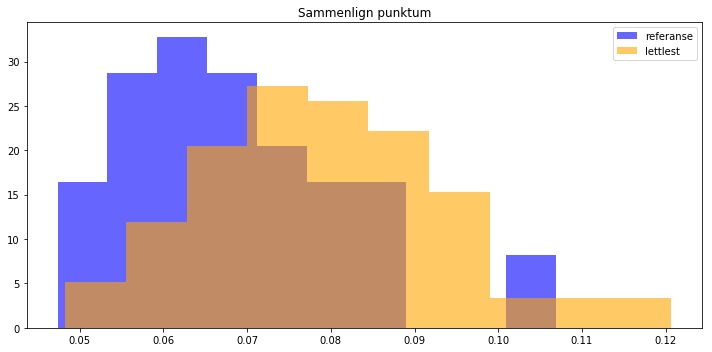

In [55]:
plottlitt(r.transpose().dropna()['.'], f.transpose()['.'], labels=['referanse','lettlest'], title="Sammenlign punktum")

#### Lettlest har flere punktum.

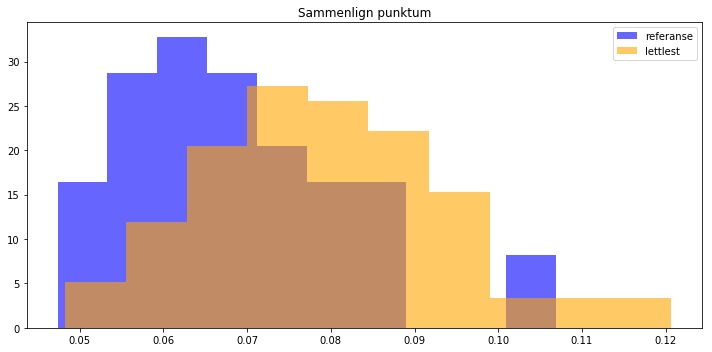

In [56]:
plottlitt(r.transpose().dropna()['.'], f.transpose()['.'], labels=['referanse','lettlest'], title="Sammenlign punktum")

# Sammenligning av andre ord

Forskjellige ord kan knyttes til forskjellige sjangre.

#### Argumenterende ord er ikke-eksisterende?

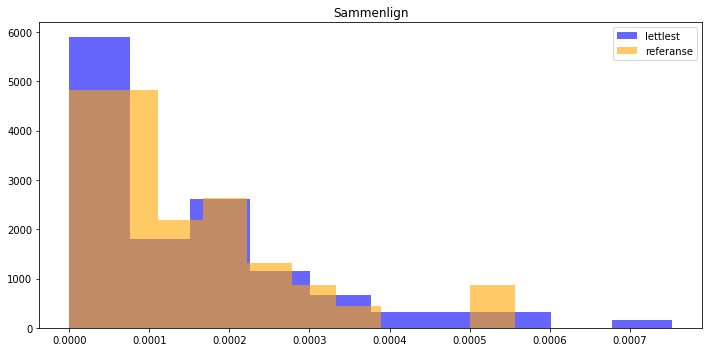

In [57]:
sammenlign(f, r, 'derfor',labels=['lettlest','referanse'])

Her kan vi også se på statistikken:

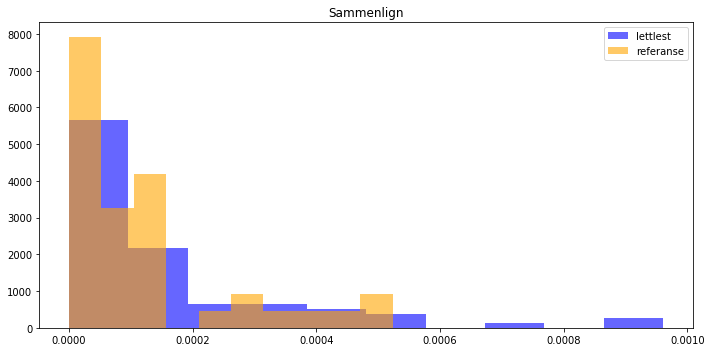

In [58]:
sammenlign(f, r, 'Derfor',labels=['lettlest','referanse'])

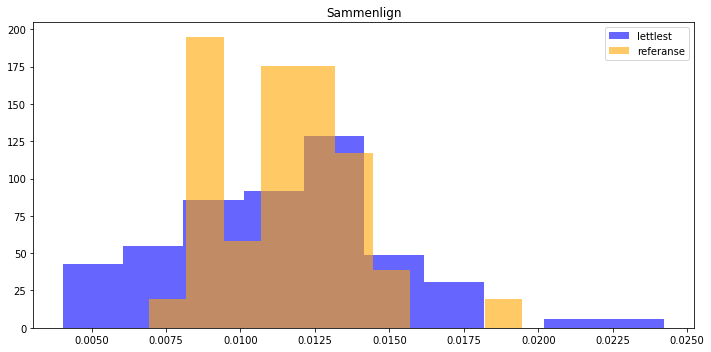

In [59]:
sammenlign(f, r, 'ikke', labels=['lettlest','referanse'])

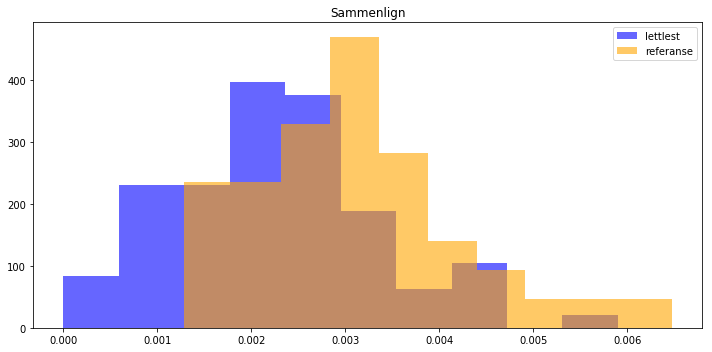

In [60]:
sammenlign(f, r, 'men', labels=['lettlest', 'referanse'])

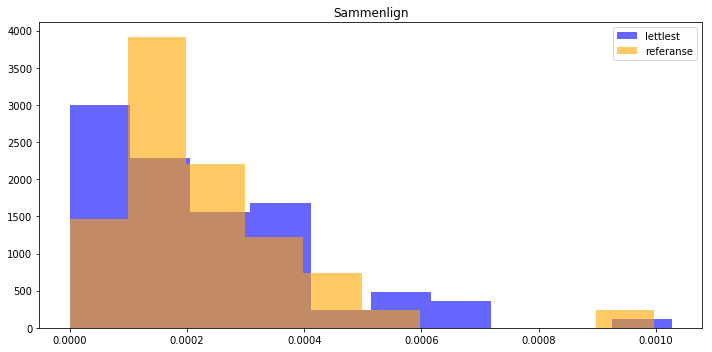

In [61]:
sammenlign(f, r, 'hvem', labels=['lettlest','referanse'])

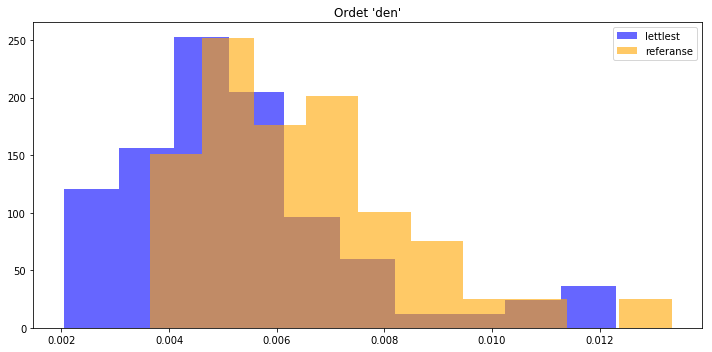

In [62]:
sammenlign(f, r, 'den', labels=['lettlest','referanse'], title="Ordet 'den'")

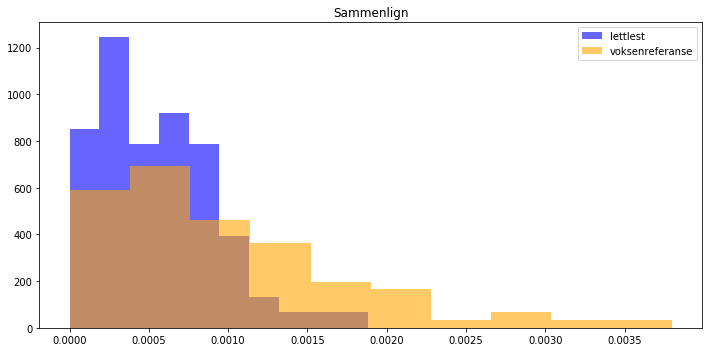

In [63]:
sammenlign(f, v, 'denne', labels=['lettlest','voksenreferanse'])

## Hvordan er det med ordlengde?

In [89]:
def gjennomsnittlig_ordlengde(f):
    sums = []
    for bok in f:
        # velger bare ut ordentlige ord - skipper tall og andre rare sekvenser av tegn
        words = [x for x in f[bok][f[bok]>0].index if x.isalpha()]
        sums.append(sum(map(len, words))/len(words))
    return sum(sums)/len(sums)

def weighted(f):
    sums = []
    for bok in f:
        bokw = []
        for w in f[bok].index:
            try:
                factor = f[bok][f[bok]>0][w]
                res = len(w)*factor
                if res > 0:
                    bokw.append(res)
            except:
                True
        sums.append(sum(bokw)/len(bokw))
    return sum(sums)/len(sums)
                    

# Ordlengder

først for lettlestbøkene

In [90]:
gjennomsnittlig_ordlengde(f)

5.623970075100122

voksenbøker

In [91]:
gjennomsnittlig_ordlengde(v)

6.516143983661408

og ungdomsbøker

In [92]:
gjennomsnittlig_ordlengde(r)

6.464323206390344

### En bokstav lengre i snitt for de andre. 

Så lettlestbøkene ser ut til å ha kortere ord.Tallene over er en statistikk for selve ordlisten, så frekvensen for ordene er ikke med.

## Histogram over ordlengde

Her grupperes ordene på ordlengde, så x-aksen angir ordlenge, og y-aksen er antall ord med akkurat den ordlengden. 

Figuren tyder på at det er mer av lengre ord i ungdomsbøkene enn det er i lettlestbøkene.

In [93]:
def ordict(f):
    fl = dict()
    for w in f.index:
        if w.isalpha():
            fl[w] = len(w)
    return fl

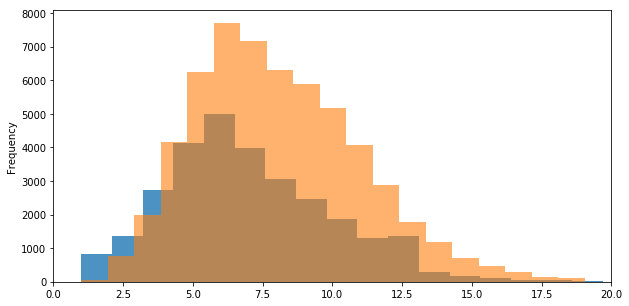

In [121]:
pd.Series(ordict(f)).plot.hist(bins=40, xlim=(0,20), grid=False, alpha=0.8, figsize=(10,5), label='lettlest');
pd.Series(ordict(r)).hist(bins=40, grid=False, alpha=0.6, label='referanse');
#pd.Series(ordict(v)).hist(bins=30, alpha=0.6)